In [40]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [41]:
df=pd.read_pickle("../../results/cluster_0.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
185,1,0,0,0,0,0,0,1,0,0,...,0,1,2,3,6.156041,1.666667,2.5,-34.196691,16.551565,0
197,1,0,0,1,0,0,0,0,0,0,...,1,0,1,2,8.244505,1.000000,2.0,-9.582847,16.215009,0
207,0,0,1,1,0,0,0,0,0,0,...,0,0,2,3,6.798192,1.000000,2.0,-23.549976,16.084715,0
208,0,1,0,0,0,0,0,0,0,1,...,1,0,1,2,7.794999,1.000000,1.0,-9.296161,16.069521,0
214,0,0,1,0,0,0,0,1,0,0,...,0,0,2,2,10.704291,1.333333,0.5,-6.791879,15.917127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,-0.345552,-0.333333,3.5,-0.820387,-0.360497,0
49491,0,0,1,0,0,0,1,0,0,0,...,1,0,2,1,-0.234184,1.000000,3.0,-1.580706,-0.360497,0
49492,0,1,0,1,0,0,0,0,0,0,...,1,0,2,2,-0.266836,-0.333333,0.0,-0.203972,-0.360958,0
49493,0,1,0,1,0,0,0,0,0,0,...,1,0,2,1,-0.093488,0.666667,0.0,-0.133305,-0.360958,0


In [42]:
df2=pd.read_pickle("../../results/cluster_sinencod_0.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.840,8,0.5,-1268.040,367.35,Critical,0
197,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.4,-348.516,360.04,High,0
207,Same Day,Home Office,APAC,Furniture,1582.200,6,0.4,-870.300,357.21,Critical,0
208,Second Class,Corporate,US,Office Supplies,1801.632,6,0.2,-337.806,356.88,High,0
214,First Class,Home Office,EU,Furniture,2442.069,7,0.1,-244.251,353.57,High,0
...,...,...,...,...,...,...,...,...,...,...,...
49490,Standard Class,Corporate,Africa,Office Supplies,9.612,2,0.7,-21.168,0.02,Medium,0
49491,First Class,Home Office,EMEA,Office Supplies,34.128,6,0.6,-49.572,0.02,Medium,0
49492,Same Day,Corporate,APAC,Office Supplies,26.940,2,0.0,1.860,0.01,High,0
49493,Same Day,Corporate,APAC,Office Supplies,65.100,5,0.0,4.500,0.01,Medium,0


In [43]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [44]:
df["Sales_robust"]=df2["Sales"]

In [45]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [46]:
model_LinearRegression=LinearRegression()
model_LinearRegression.fit(x_train,y_train)

LinearRegression()

In [47]:
print(y_train.dtypes)
print(y_test.dtypes)


Sales_robust    float64
dtype: object
Sales_robust    float64
dtype: object


In [48]:
y_test_pred=model_LinearRegression.predict(x_test)
y_train_pred=model_LinearRegression.predict(x_train)
sp.metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.715000,72.213100,16302.536900,127.681400
Test,0.701200,73.421900,17324.476300,131.622500
Diferencia Train-Test,0.013800,-1.208800,-1021.939400,-3.941100
Porcentaje diferencia (%),0.487200,-0.415000,-1.519500,-0.759900
Rango valores,2951.155000,2951.155000,2951.155000,2951.155000
Ratio Rango (%),0.023994,2.467424,569.726314,4.393261
Influencia dif rango (%),0.000500,0.041000,34.628500,0.133500
Media,171.514200,171.514200,171.514200,171.514200
Ratio Media(%),0.412852,42.455668,9802.982260,75.592546
Influencia dif media (%),0.008000,0.704800,595.833700,2.297800


- R² Score: Tanto en train (0.7150) como en test (0.7012), el modelo explica el 70% de la varianza, con una diferencia mínima (0.0138) que indica buena generalización.
- Errores (MAE, MSE, RMSE): Los errores son similares entre train y test, con diferencias porcentuales menores al 1.6%, lo que sugiere un modelo balanceado y sin sobreajuste.
- Impacto del rango: Las diferencias en los errores tienen un impacto mayor en métricas como el MSE (569.7%) debido a su sensibilidad al cuadrado, pero para R² y MAE, la influencia es baja.
- Conclusión: El modelo es sólido, generaliza bien y no muestra indicios significativos de sobreajuste o subajuste. Las métricas respaldan su fiabilidad para predicciones en nuevos datos.

In [49]:
# Asegurarse de que las variables sean unidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()
y_train = np.array(y_train).ravel()
y_train_pred = np.array(y_train_pred).ravel()

# Opcional: Convertir a series de Pandas
y_test = pd.Series(y_test)
y_test_pred = pd.Series(y_test_pred)
y_train = pd.Series(y_train)
y_train_pred = pd.Series(y_train_pred)

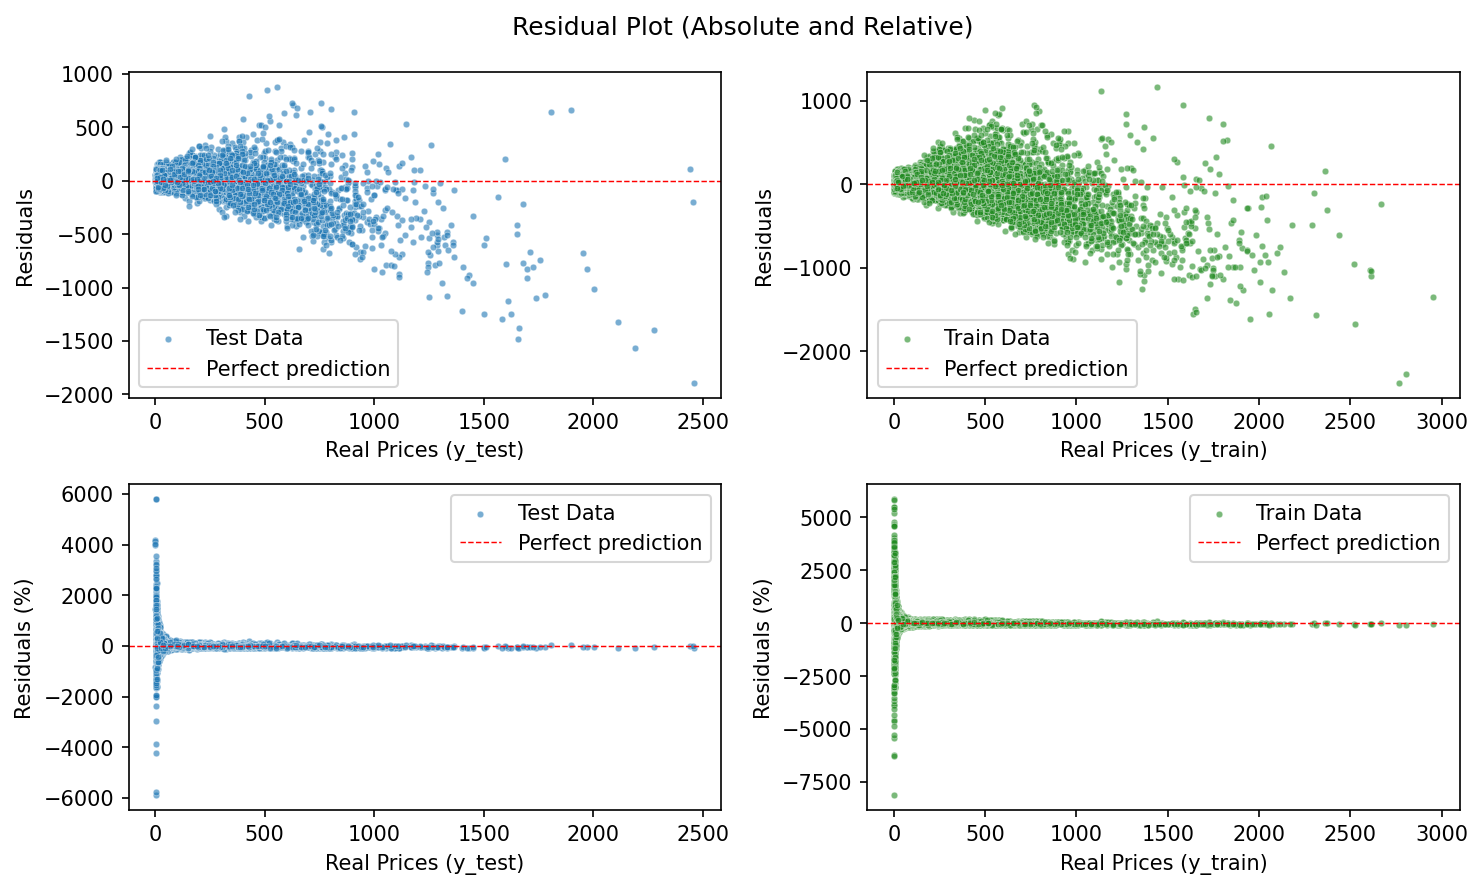

In [50]:
sp.plot_residuals(y_test, y_test_pred, y_train, y_train_pred)

Predicción general: El modelo predice bien, con errores centrados alrededor de 0 tanto en el conjunto de entrenamiento como en el de prueba, lo que indica una buena generalización.

Errores absolutos: Aumentan en los valores altos de la variable objetivo, lo que sugiere que el modelo tiene más dificultad para predecir precios altos.

Errores relativos: Son más significativos en valores bajos, debido a que pequeñas desviaciones absolutas tienen un mayor impacto relativo.

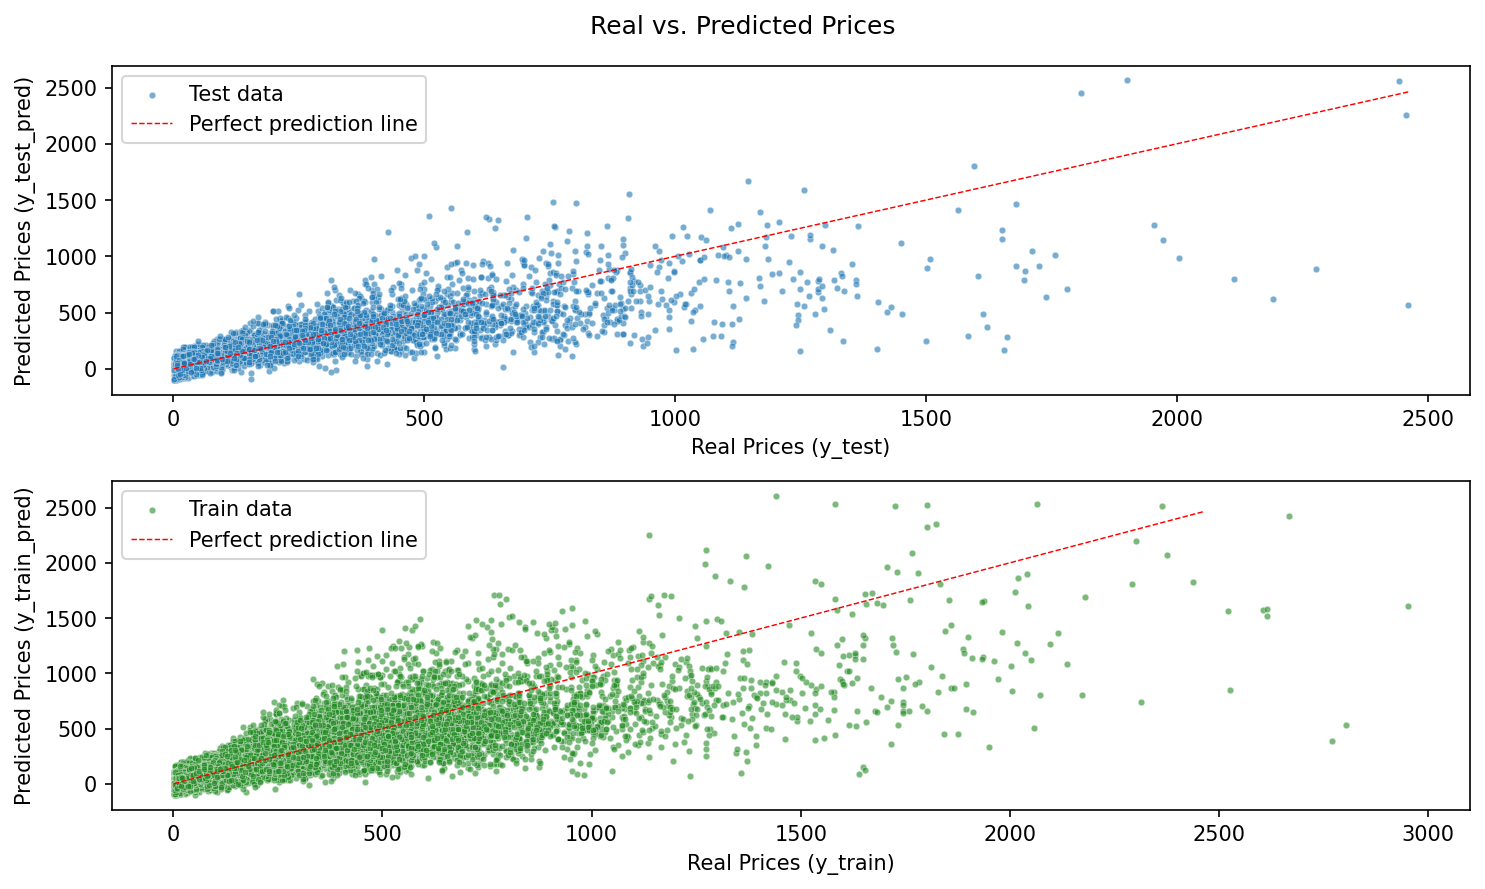

In [51]:
sp.plot_real_vs_predicted(y_test, y_test_pred, y_train, y_train_pred)

El modelo tiene un buen desempeño general, con predicciones consistentes entre los conjuntos de entrenamiento y prueba. Los valores bajos y medios están bien ajustados, pero el modelo tiende a subestimar los valores altos. Esto sugiere que, aunque generaliza bien y no presenta sobreajuste, podría beneficiarse de ajustes para manejar mejor las transacciones de alto valor, como transformaciones logarítmicas o modelos más complejos.

In [52]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_LinearRegression_cluster_0.pkl', 'wb') as file:
    pickle.dump(model_LinearRegression, file)